In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns



In [2]:
data = pd.read_csv('dataset\\bank-full.csv', delimiter=';')
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [3]:
data_info = data.info()
data_head = data.head()

data_info, data_head, data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


(None,
    age           job  marital  education default  balance housing loan  \
 0   58    management  married   tertiary      no     2143     yes   no   
 1   44    technician   single  secondary      no       29     yes   no   
 2   33  entrepreneur  married  secondary      no        2     yes  yes   
 3   47   blue-collar  married    unknown      no     1506     yes   no   
 4   33       unknown   single    unknown      no        1      no   no   
 
    contact  day month  duration  campaign  pdays  previous poutcome   y  
 0  unknown    5   may       261         1     -1         0  unknown  no  
 1  unknown    5   may       151         1     -1         0  unknown  no  
 2  unknown    5   may        76         1     -1         0  unknown  no  
 3  unknown    5   may        92         1     -1         0  unknown  no  
 4  unknown    5   may       198         1     -1         0  unknown  no  ,
 (45211, 17))

Cleaning the data by checking for null values and dropping the duplicate rows.

In [4]:
# Checking for null values
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
#Looking deeper for null values
missing_values = {
    "job": (data["job"] == "unknown").sum(),
    "education": (data["education"] == "unknown").sum(),
    "contact": (data["contact"] == "unknown").sum(),
    "poutcome": (data["poutcome"] == "unknown").sum()
}

for column, missing_count in missing_values.items():
    print(f"{column}: {missing_count} missing values")


job: 288 missing values
education: 1857 missing values
contact: 13020 missing values
poutcome: 36959 missing values


In [6]:
#Converting to pandas category type 
missing_values_count = data.replace('unknown', pd.NA).isna().sum()
missing_values_count

age              0
job            288
marital          0
education     1857
default          0
balance          0
housing          0
loan             0
contact      13020
day              0
month            0
duration         0
campaign         0
pdays            0
previous         0
poutcome     36959
y                0
dtype: int64

In [7]:
data.drop(columns=['contact', 'poutcome'], inplace=True)

In [8]:
# Checking for outliers
# Converting object types to 'category' for efficiency where appropriate
categorical_columns = data.select_dtypes(include=['object']).columns
data[categorical_columns] = data[categorical_columns].astype('category')

# Checking for outliers in numerical columns
# We use the IQR method to detect outliers
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns
Q1 = data[numerical_columns].quantile(0.25)
Q3 = data[numerical_columns].quantile(0.75)
IQR = Q3 - Q1
outliers = ((data[numerical_columns] < (Q1 - 1.5 * IQR)) | (data[numerical_columns] > (Q3 + 1.5 * IQR))).sum()

outliers_percentage = (outliers / len(data)) * 100
print("Outlier Percentages: ")
outliers_percentage

Outlier Percentages: 


age          1.077171
balance     10.459844
day          0.000000
duration     7.155338
campaign     6.777112
pdays       18.263255
previous    18.263255
dtype: float64

**Analysis:**
1. Calculate the range, mean, and mode of your attributes where it makes sense to do so.

In [9]:
# Subsetting the dataset to pick only the numeric columns
data.dtypes
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()
categorical_columns = data.select_dtypes(exclude=np.number).columns.tolist()

data_numeric_cols = data[numeric_columns]
data_numeric_cols.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [11]:
data_categorical_cols = data[categorical_columns]
data_categorical_cols.mode()

,job,marital,education,default,housing,loan,month,y
0,blue-collar,married,secondary,no,yes,no,may,no


2. Using two statistical metrics, calculate values for your attributes

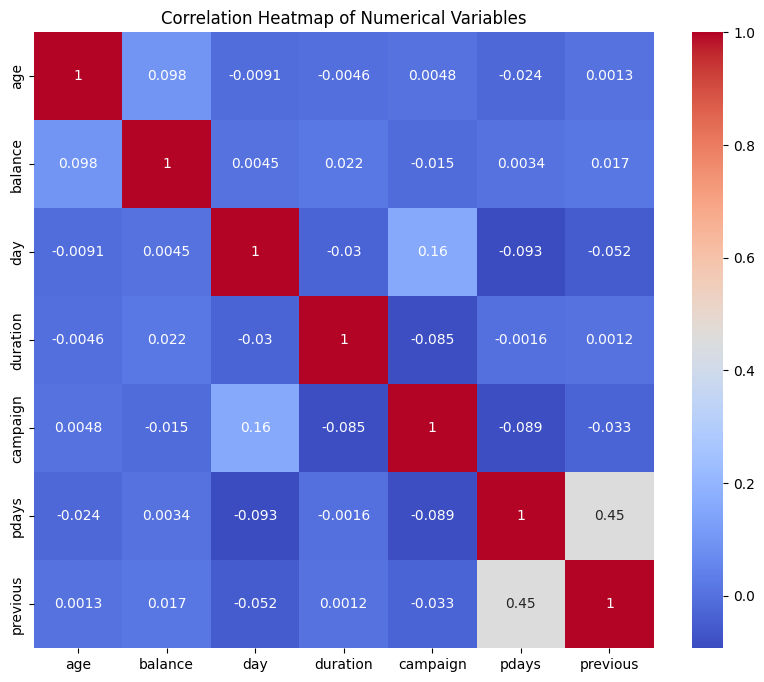

In [10]:
correlation_matrix = data[numerical_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Variables')
plt.show()

Visualisation

C:\Users\areeb\AppData\Local\Temp\ipykernel_22124\572469942.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=data, x=data['y'], palette='flare')


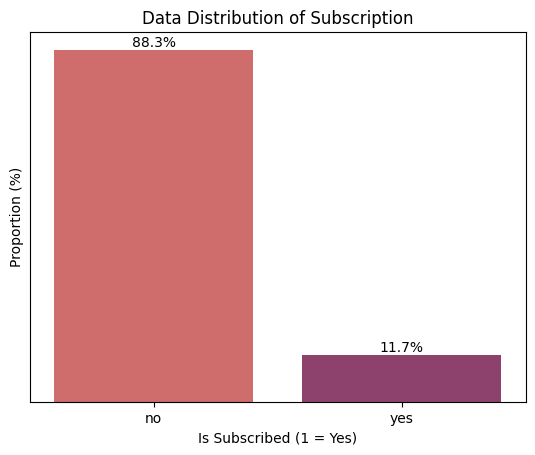

In [11]:
ax = sns.countplot(data=data, x=data['y'], palette='flare')
total = len(data)

# Loop through each bar in the countplot
for p in ax.patches:
        height = p.get_height()
        percentage = f'{100 * height / total:.1f}%'
        ax.annotate(percentage, (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Add x-axis and y-axis titles
ax.set_xlabel("Is Subscribed (1 = Yes)")
ax.set_ylabel("Proportion (%)")
plt.title(f'Data Distribution of Subscription')
ax.set_yticks([])
plt.show()

#plot_binary_target_distribution(df, 'y')

C:\Users\areeb\AppData\Local\Temp\ipykernel_22124\302961265.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bin_df, x='age_bin', ax=ax2, palette='hls')


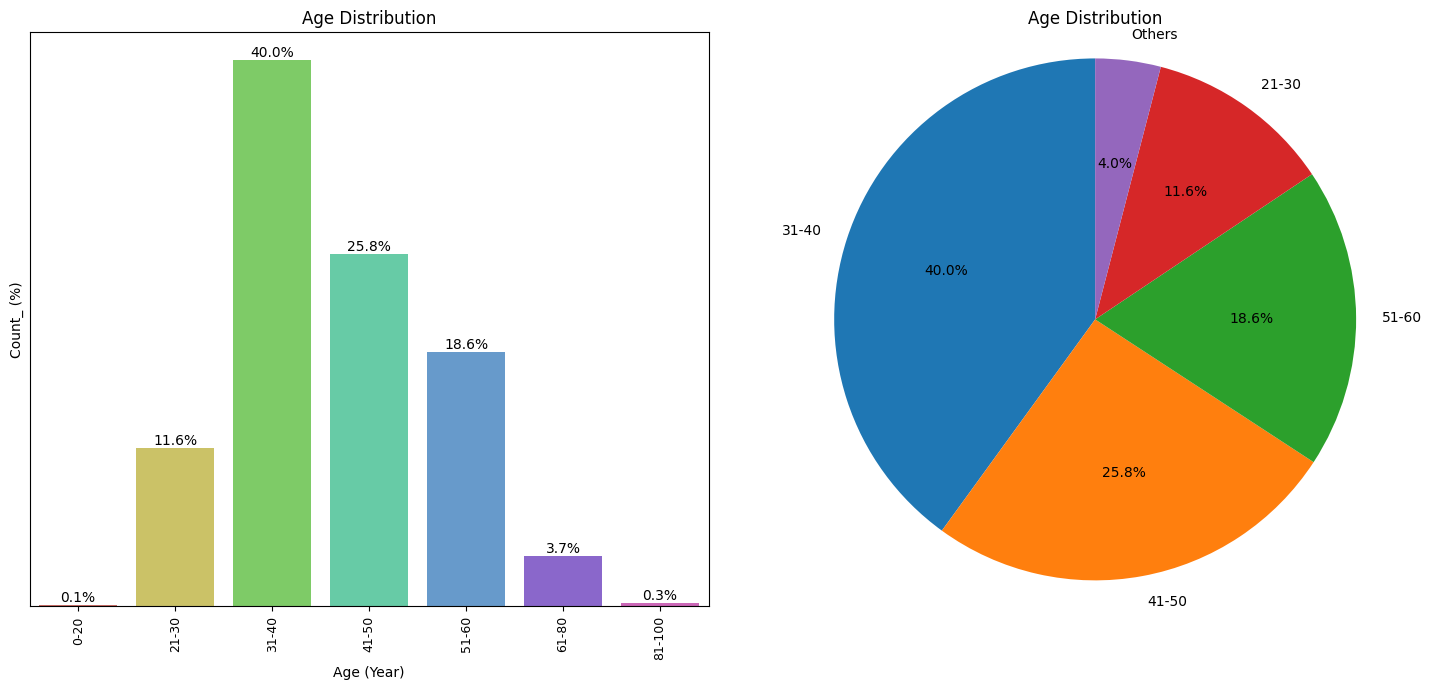

In [12]:
# Creating a pie chart to see the age distribution:
# Define bin edges and labels
bin_edges = [0, 20, 30, 40, 50, 60, 80,  100]
bin_labels = ['0-20', '21-30', '31-40', '41-50', '51-60','61-80', '81-100']

# Create a New DataFrame bin_df and Name the column 'age_bin' with the age bins
bin_df = pd.DataFrame()
bin_df['age_bin'] = pd.cut(data['age'], bins=bin_edges, labels=bin_labels, right=False)


fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Calculate the value counts and percentages for 'age_bin'
age_bin_counts = bin_df['age_bin'].value_counts()
age_bin_percentages = age_bin_counts / len(bin_df) * 100

# Apply the threshold (5%) to group values into "Others"
threshold = 5
age_bin_filtered = age_bin_percentages[age_bin_percentages >= threshold]
age_bin_filtered['Others'] = age_bin_percentages[age_bin_percentages < threshold].sum()

# Subplot 1: 'age_bin' distribution (narrower) with percentage labels
ax2 = axes[0]
sns.countplot(data=bin_df, x='age_bin', ax=ax2, palette='hls')
ax2.set_title('Age Distribution')
ax2.set_xlabel('Age (Year)')
ax2.set_ylabel('Count_ (%)')
ax2.tick_params(axis='x', rotation=90, labelsize=9)
ax2.set_yticks([])

# Calculate and display percentage labels for Subplot 1
total = len(bin_df)
for p in ax2.patches:
    height = p.get_height()
    ax2.annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height), ha='center', va='bottom')

# Subplot 2: Pie chart of 'age_bin' with "Others" category
ax1 = axes[1]
ax1.set_title('Age Distribution')
ax1.pie(age_bin_filtered, labels=age_bin_filtered.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')
plt.tight_layout()
plt.show()

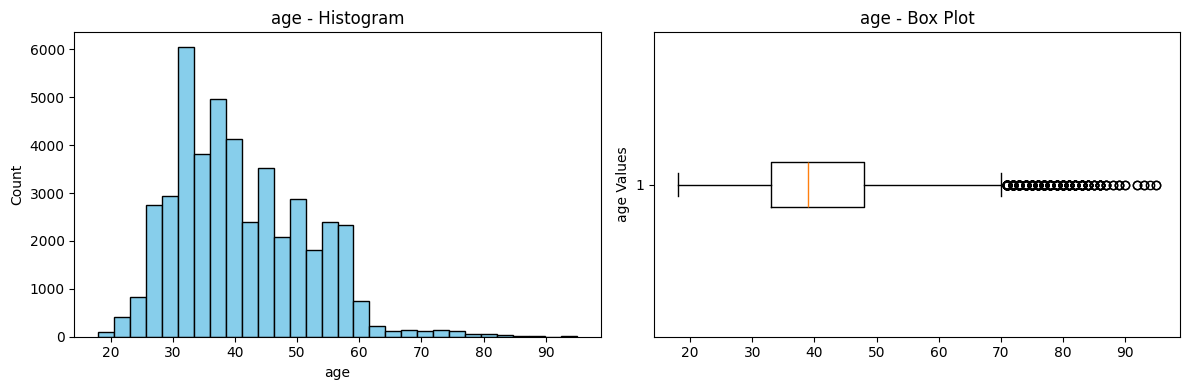

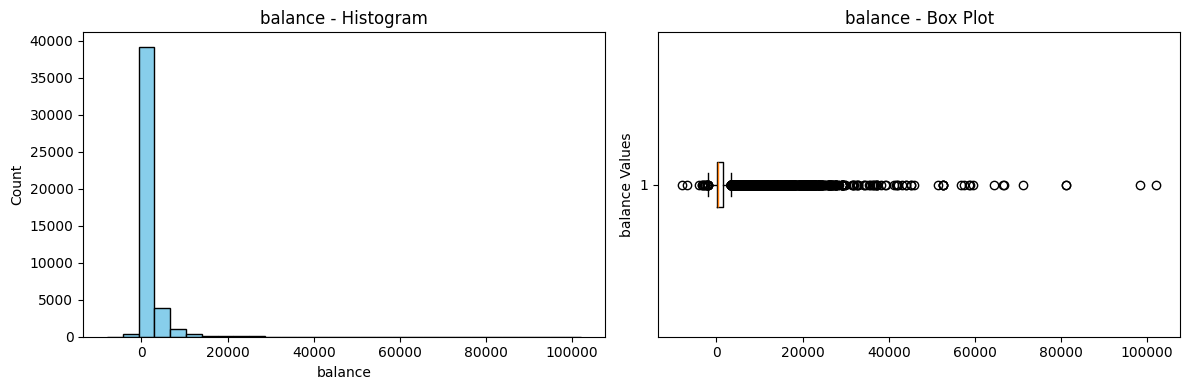

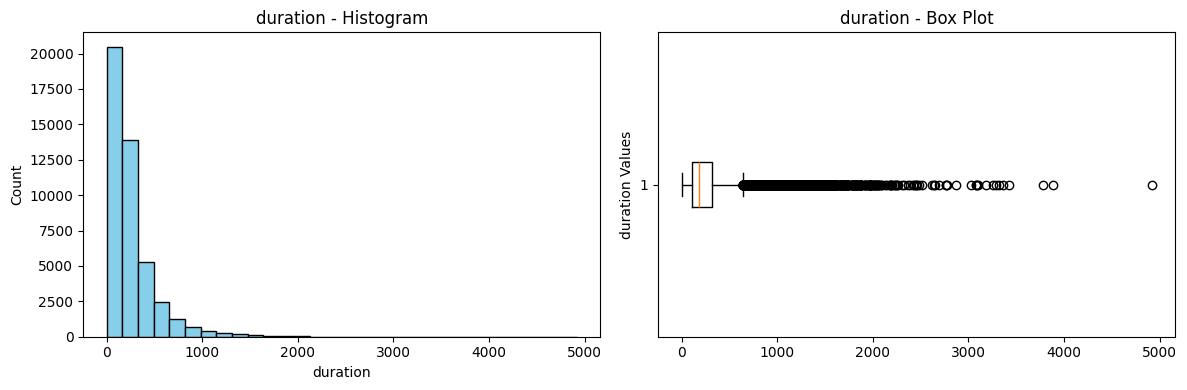

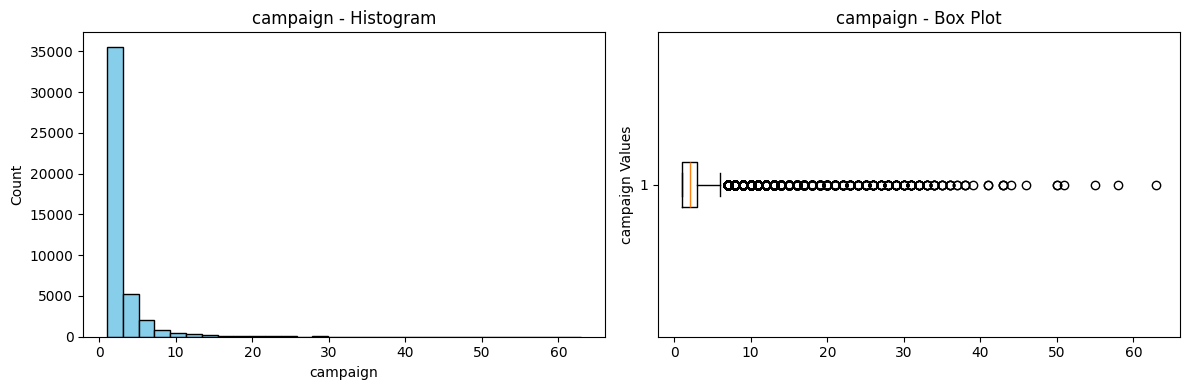

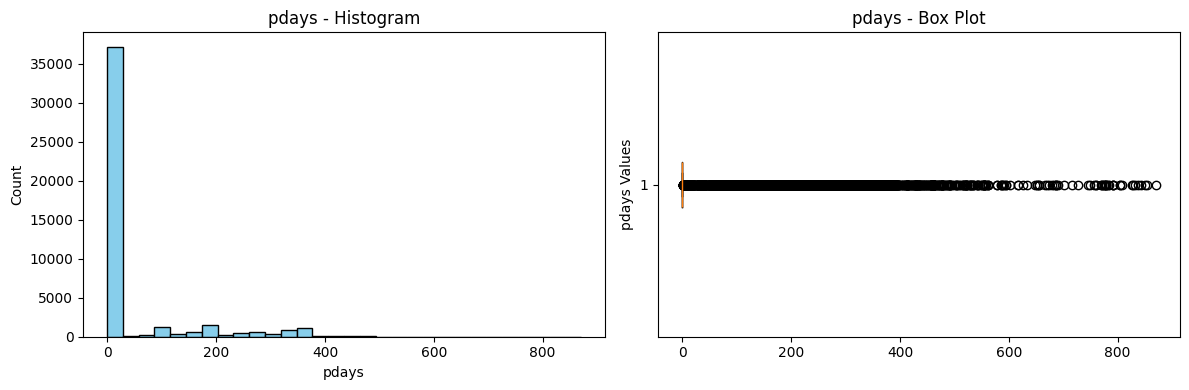

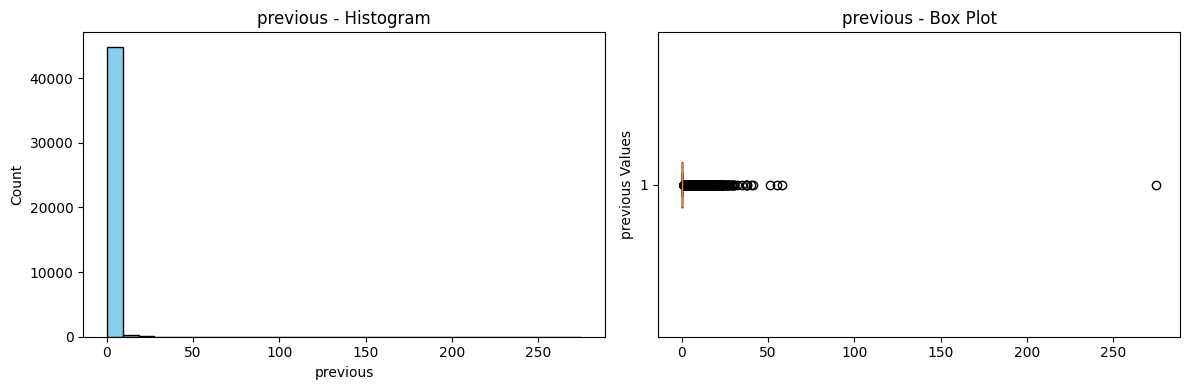

In [16]:
# Plot histograms + box plots for numerical columns

for col in numeric_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot a histogram in the first subplot
    axes[0].hist(data[col], bins=30, color='skyblue', edgecolor='black')
    axes[0].set_title(f'{col} - Histogram')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Count')

    # Plot a box plot in the second subplot
    axes[1].boxplot(data[col], vert=False)
    axes[1].set_title(f'{col} - Box Plot')
    axes[1].set_ylabel(f'{col} Values')
    plt.tight_layout()
    plt.show()


C:\Users\areeb\AppData\Local\Temp\ipykernel_19196\4227202343.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=bin_df2, x='duration_bin', ax=axes[1], palette = 'hls')


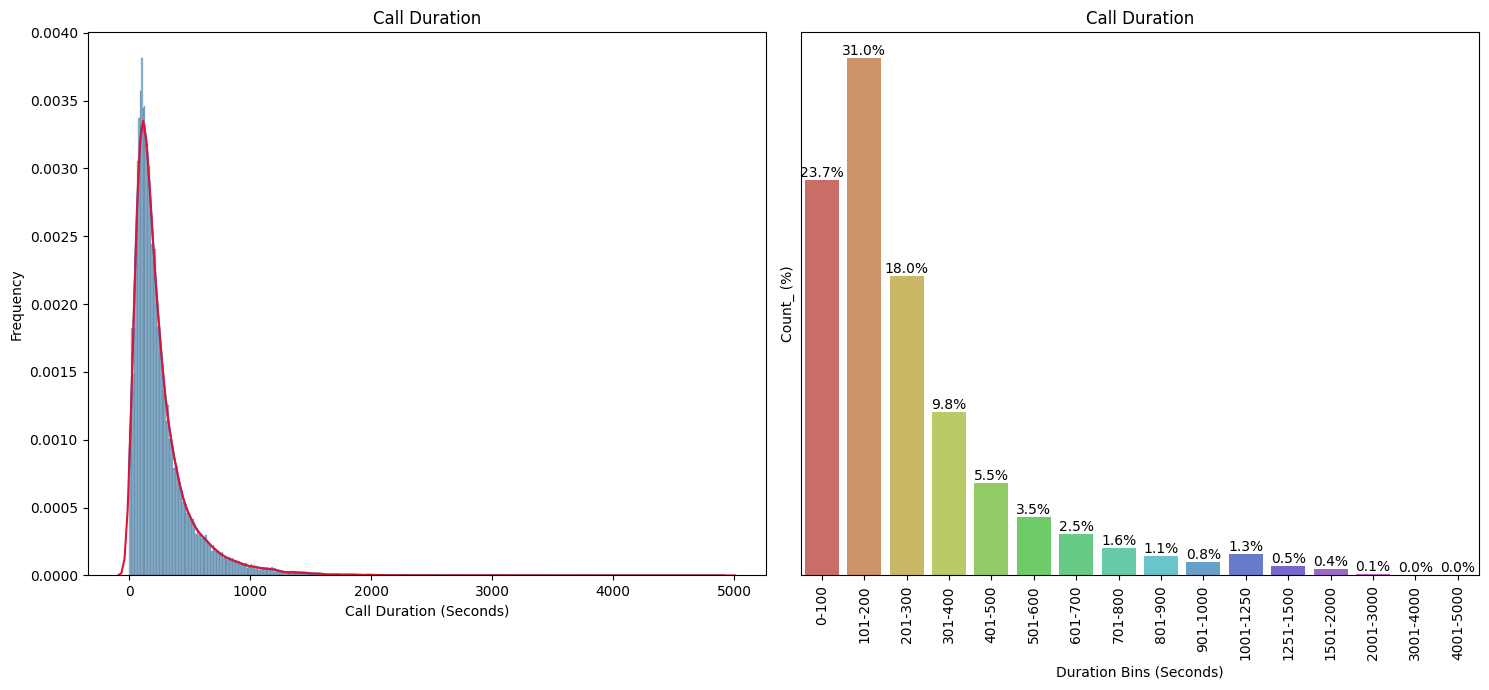

In [17]:
# Define bin edges and labels
bin_edges = [0, 100, 200, 300, 400, 500, 600,  700, 800,900,1000,1250,1500,2000,3000,4000,5000]
bin_labels = ['0-100', '101-200', '201-300', '301-400', '401-500','501-600', '601-700', '701-800', '801-900','901-1000', '1001-1250','1251-1500','1501-2000','2001-3000','3001-4000','4001-5000']

# Create a New DataFrame bin_df2 and Name the column 'duration_bin' with the duration bins
bin_df2 = pd.DataFrame()
bin_df2['duration_bin'] = pd.cut(data['duration'], bins=bin_edges, labels=bin_labels, right=False)

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

# Subplot 1: Histogram of 'duration'
axes[0].set_title('Call Duration')
axes[0].set_xlabel('Call Duration (Seconds)')
axes[0].set_ylabel('Frequency')
sns.histplot(data=data, x='duration', ax=axes[0], kde=True, stat='density')
sns.kdeplot(data=data, x='duration', color='crimson', ax=axes[0])

# Subplot 2: Countplot of 'duration_bin' with percentage labels
sns.countplot(data=bin_df2, x='duration_bin', ax=axes[1], palette = 'hls')
axes[1].set_title('Call Duration')
axes[1].set_xlabel('Duration Bins (Seconds)')
axes[1].set_ylabel('Count_ (%)')
axes[1].set_yticks([])

# Calculate and display percentage labels for Subplot 2
total = len(data)
for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height/total:.1%}', (p.get_x() + p.get_width() / 2., height),
                     ha='center', va='bottom')

axes[1].tick_params(axis='x', rotation=90)

# Show the combined plot
plt.tight_layout()
plt.show()

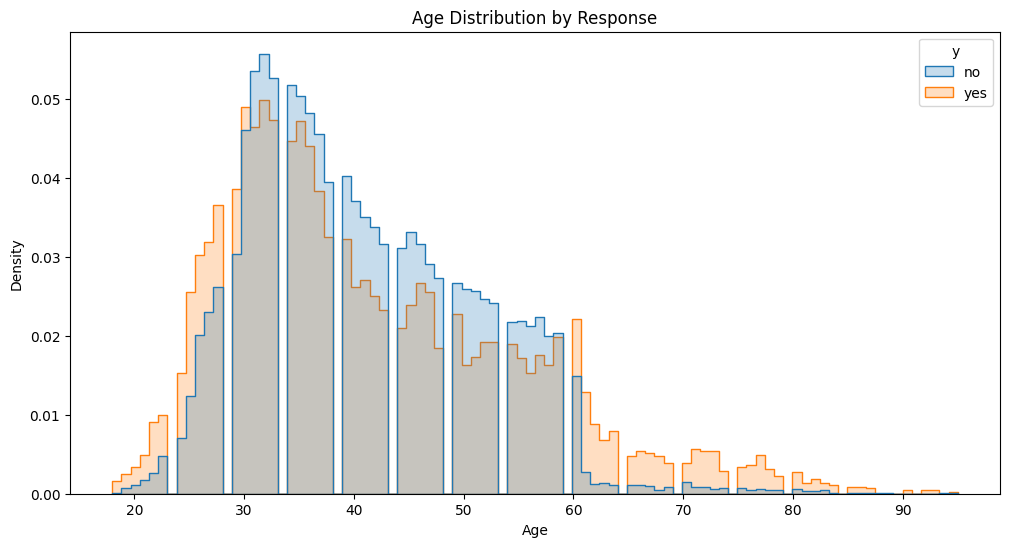

In [18]:
plt.figure(figsize=(12, 6))
sns.histplot(data=data, x='age', hue='y', element='step', stat='density', common_norm=False)
plt.title('Age Distribution by Response')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()


Using Z-score Method to Normalize the data

In [20]:
# Normalising the data 
# Using Z-score normalization to normalize the data.
import numpy as np
from sklearn.preprocessing import StandardScaler

# Handling missing values: leaving 'unknown' as is in 'job', 'education', 'contact', 'poutcome'

# Handling outliers: Applying log transformation to certain columns
columns_to_transform = ['balance', 'duration', 'campaign', 'pdays', 'previous']
data[columns_to_transform] = np.log1p(data[columns_to_transform])

# Normalization/Standardization: Standardizing numerical columns
scaler = StandardScaler()

# Correcting pdays values: adding 1 to all entries before applying the log transformation
data['pdays'] = np.log1p(data['pdays'] + 1)

# Reattempting standardization of numerical columns
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# Displaying the transformed data again
transformed_data_head = data.head()
transformed_data_head

c:\Python311\Lib\site-packages\pandas\core\internals\blocks.py:366: RuntimeWarning: invalid value encountered in log1p
  result = func(self.values, **kwargs)


,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,1.606965,management,married,tertiary,no,0.602969,yes,no,-1.298476,may,0.460485,-1.00556,NaN,-0.449689,no
1,0.288529,technician,single,secondary,no,-0.513252,yes,no,-1.298476,may,-0.073740,-1.00556,NaN,-0.449689,no
2,-0.747384,entrepreneur,married,secondary,no,-1.732461,yes,yes,-1.298476,may,-0.813329,-1.00556,NaN,-0.449689,no
3,0.571051,blue-collar,married,unknown,no,0.534632,yes,no,-1.298476,may,-0.598974,-1.00556,NaN,-0.449689,no
4,-0.747384,unknown,single,unknown,no,-2.085889,no,no,-1.298476,may,0.196395,-1.00556,NaN,-0.449689,no


Resampling techniques

1. Because our dataset is heavily imbalanced, We are going to either undersample the majority class or oversample the minority class.

We are choosing to undersample the majority class.

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encoding categorical variables
label_encoders = {}
for column in categorical_columns:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

# Encoding the target variable
label_encoder_y = LabelEncoder()
data['y'] = label_encoder_y.fit_transform(data['y'])

# Splitting the data into training and testing sets
X = data.drop('y', axis=1)
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Displaying the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape




((13563, 14), (31648, 14), (13563,), (31648,))

In [21]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.under_sampling import RandomUnderSampler

# Split the data into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42, stratify=y)

# Imputing missing values in X_train and X_test
imputer = SimpleImputer(strategy='median')  # or choose 'mean', 'most_frequent'
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Applying Random Under Sampler to balance the dataset
rus = RandomUnderSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train_imputed, y_train)

# Training the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_resampled, y_resampled)

# Predicting on the test set
y_pred_rf = rf_classifier.predict(X_test_imputed)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred_rf)
print("Undersampling Report \n",classification_rep)


Undersampling Report 
               precision    recall  f1-score   support

           0       0.98      0.82      0.89     11966
           1       0.39      0.86      0.53      1598

    accuracy                           0.82     13564
   macro avg       0.68      0.84      0.71     13564
weighted avg       0.91      0.82      0.85     13564



In [16]:
from sklearn.ensemble import GradientBoostingClassifier

# Training the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)
gb_classifier.fit(X_resampled, y_resampled)

# Predicting on the test set
y_pred_gb = gb_classifier.predict(X_test_imputed)

# Evaluating the model
classification_rep = classification_report(y_test, y_pred_gb)
print(classification_rep)

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     11966
           1       0.39      0.85      0.54      1598

    accuracy                           0.83     13564
   macro avg       0.68      0.84      0.71     13564
weighted avg       0.91      0.83      0.85     13564



Without Sampling Techniques

In [22]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate a classification report
classification_rep_rf = classification_report(y_test, y_pred_rf)

# Print the accuracy and classification report
print(f"Accuracy: {accuracy_rf}")
print("Without Undersampling Report \n",classification_rep_rf)


Accuracy: 0.8980978260869565
Without Undersampling Report 
               precision    recall  f1-score   support

           0       0.92      0.97      0.94     27935
           1       0.61      0.36      0.45      3713

    accuracy                           0.90     31648
   macro avg       0.77      0.66      0.70     31648
weighted avg       0.88      0.90      0.89     31648



In [23]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split

# Assuming 'X' and 'y' are already defined as your features and target variable from the dataset

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=42)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_classifier.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Generate a classification report
classification_rep_gb = classification_report(y_test, y_pred_gb)

# Output the accuracy and classification report
print("Accuracy: ", accuracy_gb)
print(classification_rep_gb)



Accuracy:  0.89737108190091
              precision    recall  f1-score   support

           0       0.92      0.97      0.94     27935
           1       0.60      0.37      0.46      3713

    accuracy                           0.90     31648
   macro avg       0.76      0.67      0.70     31648
weighted avg       0.88      0.90      0.89     31648

